In [19]:
import math
from operator import itemgetter

import numpy as np
import pandas as pd
from io import StringIO
import graphviz
import pydotplus
from typing import Dict, Tuple

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics._classification import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from IPython.core.display import HTML
from sklearn.tree import export_text
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

# Спецификация
<li> age - возраст
<li> sex - пол
<li> cp - тип боли в груди
<li> trestbps - артериальное давление в покое
<li> chol - холестерин сыворотки
<li> fbs - уровень сахара в крови натощак
<li> restecg - результаты электрокардиографии в покое
<li> thalach - максимальная частота сердечных сокращений
<li> exang - стенокардия, вызванная физической нагрузкой (1 - да, 0 - нет)
<li> oldpeak - депрессия, вызванная физической нагрузкой, по сравнению с состоянием пока 
<li> slope - наклон пикового сегмента при нагрузке
<li> ca - количество крупных сосудов (0 - 3), окрашенных при флюороскопии
<li> thal - 1 - нормальный, 2 - фиксированный дефект, 3 - обратимый дефект
<li> target - 1 или 0

In [20]:
data=pd.read_csv('../datasets/heart.csv')

In [21]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125.0,212.0,0.0,1,168.0,0.0,1.0,2,2,3.0,0.0
1,53.0,1,0,NaN,203.0,1.0,0,155.0,1.0,3.1,0,0,3.0,0.0
2,70.0,1,0,145.0,NaN,0.0,1,125.0,1.0,2.6,0,0,3.0,0.0
3,61.0,1,0,148.0,203.0,0.0,1,161.0,0.0,0.0,2,1,3.0,0.0
4,62.0,0,0,138.0,294.0,1.0,1,NaN,0.0,1.9,1,3,2.0,0.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1022 non-null   float64
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1008 non-null   float64
 4   chol      1007 non-null   float64
 5   fbs       1021 non-null   float64
 6   restecg   1025 non-null   int64  
 7   thalach   1015 non-null   float64
 8   exang     1023 non-null   float64
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1024 non-null   float64
 13  target    1024 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 112.2 KB


In [23]:
data.isna().sum()

age          3
sex          0
cp           0
trestbps    17
chol        18
fbs          4
restecg      0
thalach     10
exang        2
oldpeak      0
slope        0
ca           0
thal         1
target       1
dtype: int64

In [24]:
data=data.dropna()
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
print('disease: ')
print(data[data['target']==1].describe().T)

disease: 
          count        mean        std    min    25%    50%    75%    max
age       503.0   52.405567   9.623310   29.0   44.0   52.0   59.0   76.0
sex       503.0    0.572565   0.495199    0.0    0.0    1.0    1.0    1.0
cp        503.0    1.363817   0.949336    0.0    1.0    2.0    2.0    3.0
trestbps  503.0  129.292247  16.277599   94.0  120.0  130.0  140.0  180.0
chol      503.0  240.510934  52.949004  126.0  208.0  234.0  265.0  564.0
fbs       503.0    0.135189   0.342266    0.0    0.0    0.0    0.0    1.0
restecg   503.0    0.598410   0.502739    0.0    0.0    1.0    1.0    2.0
thalach   503.0  158.610338  18.923290   96.0  149.0  161.0  172.0  202.0
exang     503.0    0.135189   0.342266    0.0    0.0    0.0    0.0    1.0
oldpeak   503.0    0.557654   0.768021    0.0    0.0    0.2    1.0    4.2
slope     503.0    1.596421   0.580345    0.0    1.0    2.0    2.0    2.0
ca        503.0    0.375746   0.883654    0.0    0.0    0.0    0.0    4.0
thal      503.0    2.119284 

In [26]:
print('no disease: ')
print(data[data['target']==0].describe().T)

no disease: 
          count        mean        std    min    25%    50%    75%    max
age       467.0   56.436831   7.985621   35.0   52.0   58.0   62.0   77.0
sex       467.0    0.835118   0.371472    0.0    1.0    1.0    1.0    1.0
cp        467.0    0.479657   0.906056    0.0    0.0    0.0    0.0    3.0
trestbps  467.0  134.044968  18.716547  100.0  120.0  130.0  144.0  200.0
chol      467.0  251.102784  49.252591  131.0  217.0  249.0  284.0  409.0
fbs       467.0    0.162741   0.369525    0.0    0.0    0.0    0.0    1.0
restecg   467.0    0.451820   0.543526    0.0    0.0    0.0    1.0    2.0
thalach   467.0  138.854390  22.875015   71.0  125.0  142.0  156.5  195.0
exang     467.0    0.552463   0.497773    0.0    0.0    1.0    1.0    1.0
oldpeak   467.0    1.593790   1.287953    0.0    0.6    1.4    2.5    6.2
slope     467.0    1.171306   0.564119    0.0    1.0    1.0    2.0    2.0
ca        467.0    1.175589   1.029190    0.0    0.0    1.0    2.0    4.0
thal      467.0    2.5374

### Вывод на основе отличий признаков у людей с болезнями и без них

<li> Средний возраст практически не отличается
<li> Заболеваний меньше всего у мужчин, при наличии заболевания 57% мужчины, 43% женщины
<li> Артериальное давление в покое не отличается - 134 без заболевания и 129 с заболеванием
<li> Холестерин почти не отличается - 251 без заболевания и 240 с заболеванием
<li> Уровень сахара в крови натощак слабо отличается - 0.16 без заболевания и 0.135 с заболеванием
<li> Стенокардия, вызванная физической нагрузкой, более распространена у людей без заболевания - 0.55 и 0.135 у людей с заболеванием
<li> Депрессия, вызванная физической нагрузкой, по сравнению с состоянием покоя выше у людей без заболевания - 1.59 и 0.56 у людей с заболеванием
<li> У людей без заболевание количество крупных сосудов больше, чем у людей с заболеванием - 1.17 и 0.375

С использованием метода train_test_split разделим выборку на обучающую и тестовую

Построим модель бинарной классификации пользователей, где целевой признак - наличие сердечного заболевания

In [27]:
x = data.drop(['target'], axis = 1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.transform(x_test)

Логическая регрессия

In [28]:
# Разбиение на матрицу объекты-признаки и целевой признак (таргет)
X = data.drop("target", axis=1).values
y = data["target"].values
X, y

(array([[52.,  1.,  0., ...,  2.,  2.,  3.],
        [61.,  1.,  0., ...,  2.,  1.,  3.],
        [58.,  0.,  0., ...,  1.,  0.,  2.],
        ...,
        [47.,  1.,  0., ...,  1.,  1.,  2.],
        [50.,  0.,  0., ...,  2.,  0.,  2.],
        [54.,  1.,  0., ...,  1.,  1.,  3.]]),
 array([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
        1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
        0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
        1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        1., 1., 0., 0., 0., 0.,

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 9)

In [30]:
%%time
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_test_log_reg = log_reg.predict(X_test)
y_pred_train_log_reg = log_reg.predict(X_train)
print(classification_report(y_train, y_pred_train_log_reg), classification_report(y_test, y_pred_test_log_reg))

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85       427
         1.0       0.83      0.90      0.87       446

    accuracy                           0.86       873
   macro avg       0.86      0.86      0.86       873
weighted avg       0.86      0.86      0.86       873
               precision    recall  f1-score   support

         0.0       0.83      0.95      0.88        40
         1.0       0.96      0.86      0.91        57

    accuracy                           0.90        97
   macro avg       0.89      0.90      0.90        97
weighted avg       0.91      0.90      0.90        97

CPU times: total: 125 ms
Wall time: 1.08 s


In [31]:
%%time
# Оценка модели с применением кросс-валидации
scores_log_reg = cross_val_score(log_reg, X, y, cv=25)
np.mean(scores_log_reg)

CPU times: total: 5.2 s
Wall time: 27 s


0.8470985155195683

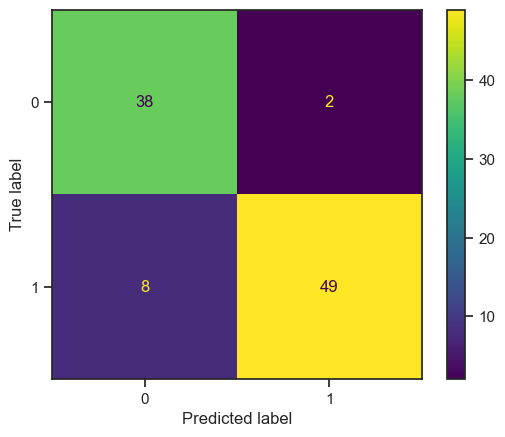

In [32]:
cm_log_reg = confusion_matrix(y_test, y_pred_test_log_reg, labels = log_reg.classes_)
display_ = ConfusionMatrixDisplay(
    confusion_matrix=cm_log_reg
)
display_.plot()

Метод опорных векторов SVM


In [33]:
%%time
svc = SVC(kernel='rbf') # 0.83, 0.84
#svc = SVC(kernel='sigmoid') # 0.69, 0.7
#svc = SVC(kernel='poly') # 0.83, 0.82
svc.fit(X_train, y_train)
y_pred_test_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)
print(classification_report(y_train, y_pred_train_svc), classification_report(y_test, y_pred_test_svc))

              precision    recall  f1-score   support

         0.0       0.73      0.65      0.69       427
         1.0       0.70      0.76      0.73       446

    accuracy                           0.71       873
   macro avg       0.71      0.71      0.71       873
weighted avg       0.71      0.71      0.71       873
               precision    recall  f1-score   support

         0.0       0.60      0.60      0.60        40
         1.0       0.72      0.72      0.72        57

    accuracy                           0.67        97
   macro avg       0.66      0.66      0.66        97
weighted avg       0.67      0.67      0.67        97

CPU times: total: 109 ms
Wall time: 224 ms


In [34]:
%%time
# Оценка модели с применением кросс-валидации
scores_svc = cross_val_score(svc, X, y, cv=10)
np.mean(scores_svc)

CPU times: total: 438 ms
Wall time: 583 ms


0.7010309278350516

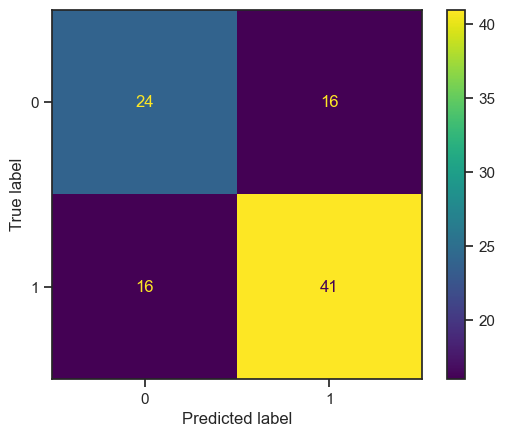

In [35]:
cm_svc = confusion_matrix(y_test, y_pred_test_svc, labels=svc.classes_)
display_ = ConfusionMatrixDisplay(
    confusion_matrix=cm_svc
)
display_.plot()

Дерево решений


In [36]:
X_tree = data.drop("target", axis=1, inplace=False).values
y_tree = data["target"].values
X_tree, y_tree

(array([[52.,  1.,  0., ...,  2.,  2.,  3.],
        [61.,  1.,  0., ...,  2.,  1.,  3.],
        [58.,  0.,  0., ...,  1.,  0.,  2.],
        ...,
        [47.,  1.,  0., ...,  1.,  1.,  2.],
        [50.,  0.,  0., ...,  2.,  0.,  2.],
        [54.,  1.,  0., ...,  1.,  1.,  3.]]),
 array([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
        1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
        0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
        1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        1., 1., 0., 0., 0., 0.,

In [37]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size = 0.1, random_state = 9)


In [38]:
tree = DecisionTreeClassifier(random_state=9).fit(X_train_tree, y_train_tree)
y_pred_test_tree = tree.predict(X_test_tree)
y_pred_train_tree = tree.predict(X_train_tree)
print(classification_report(y_train_tree, y_pred_train_tree), classification_report(y_test_tree, y_pred_test_tree))
# при стандартном обучении получаем переобучение

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       427
         1.0       1.00      1.00      1.00       446

    accuracy                           1.00       873
   macro avg       1.00      1.00      1.00       873
weighted avg       1.00      1.00      1.00       873
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         1.0       1.00      1.00      1.00        57

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



In [39]:
params = {
    'max_depth': range(3, 16)
}

In [40]:
%%time
grid_1 = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=9),
    param_grid=params,
    scoring='accuracy',
    cv=20
)
grid_1.fit(X_tree, y_tree)
grid_1.best_params_, grid_1.best_score_

CPU times: total: 812 ms
Wall time: 1.42 s


({'max_depth': 10}, 0.9979591836734695)

In [41]:
tree_rules = export_text(grid_1.best_estimator_, feature_names=list(data.drop("target", axis=1).columns))
HTML('<pre>' + tree_rules + '</pre>')

In [42]:
def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

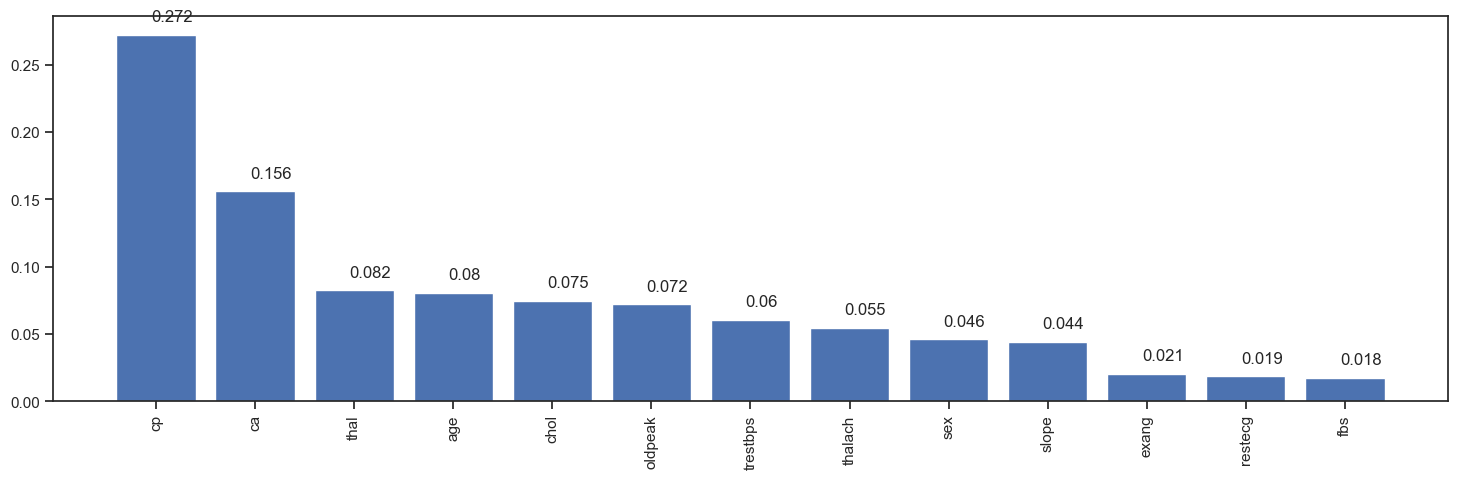

In [43]:
iris_tree_cl_fl, iris_tree_cl_fd = draw_feature_importances(grid_1.best_estimator_, data)


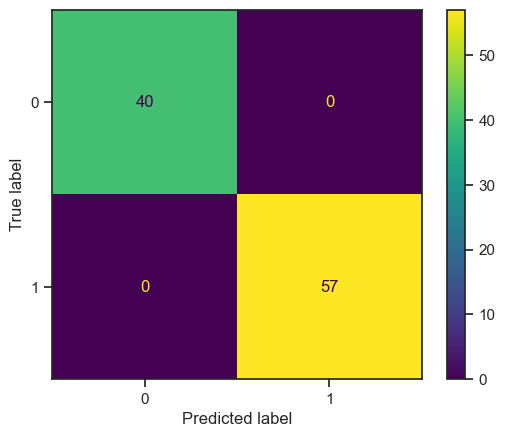

In [44]:
cm_tree = confusion_matrix(y_test_tree, grid_1.best_estimator_.predict(X_test_tree))
display_ = ConfusionMatrixDisplay(
    confusion_matrix=cm_tree
)
display_.plot()